# Neural Networks 



## The Perceptron


To get an intuitive idea about Neural Networks, let us code an elementary perceptron. In this example we will illustrate some of the concepts we have seen, build a small perceptron and make a link between Perceptron and linear classification.

### Learning Activity 1: Generating some data

Before working with the MNIST dataset, you'll first test your perceptron implementation on a "toy" dataset with just a few data points. This allows you to test your implementations with data you can easily inspect and visualise without getting lost in the complexities of the dataset itself.


Start by loading two basic libraries: `matplotlib` for plotting graphs (http://matplotlib.org/contents.html) and `numpy` for numerical computing with vectors, matrices, etc. (http://docs.scipy.org/doc/).



In [3]:
# Load the libraries

import matplotlib.pyplot as plt
import numpy as np
pl=plt
%matplotlib inline  

Then let us generate some points in 2-D that will form our dataset:

In [43]:
# Create some data points using np.array([[x1, y1], [x2, y2], ... for arbitrary xi,yi
I = range(0, 101, 1)
X = np.array(I)
Y = [np.random.poisson(i, 1)[0] for i in I]
Y_1 = np.array(zip(X,Y))
Y_2 = np.array(zip(X,[i**2 for i in Y]))

Let's visualise these points in a scatterplot using the `plot` function from `matplotlib`

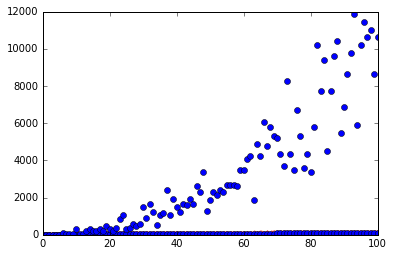

In [30]:
# Visualise the points in a scatterplot using plot
pl.plot(X,Y_1,'rx')
pl.plot(X,Y_2,'bo')

In [31]:
crosses = np.array([[0.5, 1],[1, 1.5],[1.5, 1.5],[2,1.2],[3,1.7],[1.5,1.1],[2.1,1.7]])
circles = np.array([[3, 0.5],[4,1],[5,0.7],[4,0.2],[5.1,0.3],[4.2,0.7]])

(0, 6)

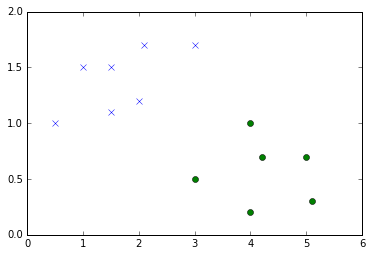

In [53]:
plt.plot(crosses[:,0],crosses[:,1],marker='x',linestyle='none')
plt.plot(circles[:,0],circles[:,1],marker='o',linestyle='none')
plt.ylim((0,2))
plt.xlim((0,6))


Here, imagine that the purpose is to build a classifier that for a given **new** point will return whether it belongs to the crosses (class 1) or circles (class 0).

### Learning Activity 2: Computing the output of a Perceptron

Let’s now define a function which returns the output of a Perceptron for a single input point.


In [33]:
# Now let's build a perceptron for our points

def outPerceptron(x, w, b):
    innerProd = np.dot(x, w)    # computes the weighted sum of input
    output    = 0
    if innerProd > b:
        output = 1
    return output

It’s useful to define a function which returns the sequence of outputs of the Perceptron for a sequence
of input points:

In [34]:
# Define a function which returns the sequence of outputs for a sequence of input points

def multiOutPerceptron(X,w,b):
    nInstances = X.shape[0]
    outputs    = np.zeros(nInstances)
    for i in range(0,nInstances):
        outputs[i] = outPerceptron(X[i,:],w,b)
    return outputs

### Bonus Activity: Efficient coding of multiOutPerceptron

In the above implementation, the simple `outPerceptron` function is called for every single instance. It
is cleaner and more efficient to code everything in one function using matrices:

In [36]:
# Optimise/simplify the multiOutPerceptron function
def multiOutPerceptron2(X,w,b):
    return (np.dot(X,w) > b).astype(float)


In the above implementation, the simple `outPerceptron` function is called for every single instance. It is cleaner and more efficient to code everything in one function using matrices.

### Learning Activity 4: Playing with weights and thresholds

Let’s try some weights and thresholds, and see what happens:

In [45]:
test_w1 = [1,1]
test_b1 = 1
instances = np.concatenate((Y_1, Y_2),axis=0)

print(X.shape, Y_1.shape, Y_2.shape, instances.shape)
print(multiOutPerceptron(instances, test_w1, test_b1))
print(multiOutPerceptron2(instances, test_w1, test_b1))

((101,), (101, 2), (101, 2), (202, 2))
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [48]:
# Try entering some initial weights and thresholds in the multiOutPerceptron and check the output
test_w1 = [1,1]
test_b1 = 1
instances = np.concatenate((crosses, circles),axis=0)

print(crosses.shape, circles.shape, instances.shape)
print(multiOutPerceptron(instances, test_w1,test_b1))

((7, 2), (6, 2), (13, 2))
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [52]:
test_w2 = [-0.5,1]
test_b2 = -0.2
instances = np.concatenate((crosses, circles),axis=0)
print(multiOutPerceptron(instances,test_w2,test_b2))


[ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]


Assuming you've chosen the weight/threshold at random you should get a rather poor classification of your points. Let's try something else (an educated guess this time) [Assuming now we are considering the following set of points]

In [ ]:
crosses = np.array([[0.5, 1], [1, 1.5], [1.5, 1.5], [2,1.2],[3,1.7],[1.5,1.1],[2.1,1.7]])
circles = np.array([[3, 0.5], [4,1], [5,0.7],[4,0.2],[5.1,0.3],[4.2,0.7]])
instances = np.concatenate((crosses,circles),axis=0)

In [55]:
zip(crosses, np.dot(crosses, test_w2))

[(array([ 0.5,  1. ]), 0.75),
 (array([ 1. ,  1.5]), 1.0),
 (array([ 1.5,  1.5]), 0.75),
 (array([ 2. ,  1.2]), 0.19999999999999996),
 (array([ 3. ,  1.7]), 0.19999999999999996),
 (array([ 1.5,  1.1]), 0.35000000000000009),
 (array([ 2.1,  1.7]), 0.64999999999999991)]

In [ ]:
np.dot(crosses, test_w2) > b

In [ ]:
# Try an "educated guess"

This is much better! To obtain these values, we found a **separating hyperplane** (here a line) between the points. The equation of the line is 

y = 0.5x-0.2


**Quiz**
- **Can you explain why this line corresponds to the weights and bias we used?**
- **Is this separating line unique? what does it mean?**

Can you check that the perceptron will indeed classify any point above the red line as a 1 (cross) and every point below as a 0 (circle)?


### Learning Activity 5: Illustration of the output of the Perceptron and the separating line


(0, 6)

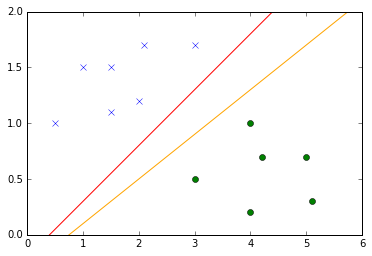

In [56]:
# Visualise the separating line
xx  = np.linspace(0,6)
yy1 = 0.5*xx-0.2
yy2 = 0.4*xx-0.3

plt.plot(xx,yy1,color='red')
plt.plot(xx,yy2,color='orange')
plt.plot(crosses[:,0],crosses[:,1],marker='x',linestyle='none')
plt.plot(circles[:,0],circles[:,1],marker='o',linestyle='none')
plt.ylim((0,2))
plt.xlim((0,6))

Now try adding the following points to see how they are classified:

[ 1.  0.  0.]
[ 1.  0.  1.]


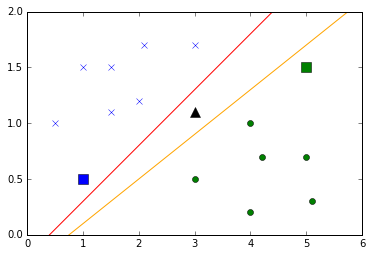

In [57]:
test_w3 = [-0.4,1]
test_b3 = -0.3
testPoints = np.array([[1,0.5],[5,1.5],[3,1]])
print(multiOutPerceptron(testPoints,test_w2,test_b2))
print(multiOutPerceptron(testPoints,test_w3,test_b3))

# visualise
plt.plot(xx,yy1,color='red')
plt.plot(xx,yy2,color='orange')
plt.plot(crosses[:,0],crosses[:,1],marker='x',linestyle='none')
plt.plot(circles[:,0],circles[:,1],marker='o',linestyle='none')
plt.ylim((0,2))
plt.xlim((0,6))

# the points
plt.plot(1,0.5,marker='s',color='blue',markersize=10)
plt.plot(5,1.5,marker='s',color='green',markersize=10)
plt.plot(3,1.1,marker='^',color='black',markersize=10)

Visualise the new test points in the graph and plot the separating lines.

In [ ]:
# Visualise the new points and line


Note here that the two sets of parameters classify the squares identically but not the triangle. You can now ask yourself, which one of the two sets of parameters makes more sense? How would you classify that triangle? These type of points are frequent in realistic datasets and the question of how to classify them "accurately" is often very hard to answer...


# Gradient Descent

### Learning Activity 6: Coding a simple gradient descent

Definition of a function and it's gradient

$f(x) = \exp(-\sin(x))x^2$

$f'(x) = -x \exp(-\sin(x)) (x\cos(x)-2)$

It is convenient to define python functions which return the value of the function and its gradient at an arbitrary point $x$

In [63]:
def function(x):
    return np.exp(-np.sin(x))*(x**2)

def gradient(x):
    return -x*np.exp(-np.sin(x))*(x*np.cos(x)-2) # use wolfram alpha!

Let's see what the function looks like

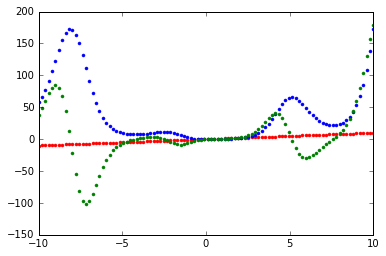

In [71]:
# Visualise the function 
data_x = np.linspace(-10,10,100)
pl.plot(data_x, data_x, 'r.')
pl.plot(data_x, map(function, data_x), 'b.')
pl.plot(data_x, map(gradient, data_x), 'g.')

Now let us implement a simple Gradient Descent that uses constant stepsizes. We define two functions, the first one is the most simple version which doesn't store the intermediate steps that are taken. The second one does store the steps which is useful to visualize what is going on and explain some of the typical behaviour of GD.

In [102]:
def simpleGD(x0, stepsize, nsteps):
    x    = x0
    for k in range(0,nsteps):
        x -= stepsize*gradient(x)
    return x

def _simpleGD(x0,stepsize,nsteps):
    x    = x0
    for k in xrange(0,nsteps):
        x -= stepsize*gradient(x)
        yield x

def simpleGD2(x0,stepsize,nsteps):
    x    = np.zeros(nsteps+1)
    x[0] = x0
    for k in range(0,nsteps):
        x[k+1] = x[k]-stepsize*gradient(x[k])
    return x

Let's see what it looks like. Let's start from $x_0 = 3$, use a (constant) stepsize of $\delta=0.1$ and let's go for 100 steps.

In [103]:
# Try the first given values 
simpleGD(3, 0.1, 100)

1.5831079987538766e-08

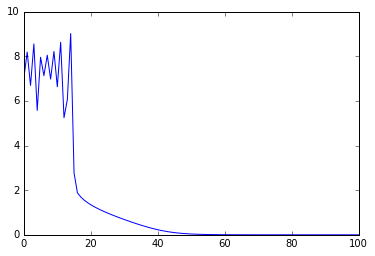

In [107]:
pl.plot(simpleGD2(7, 0.1, 100))

In [86]:
cProfile.run('simpleGD(3, 0.1, 100)')
cProfile.run('[i for i in _simpleGD(3, 0.1, 100)]')
cProfile.run('simpleGD2(3, 0.1, 100)')

         104 function calls in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.001    0.000    0.001    0.000 <ipython-input-63-cb866bedc2b9>:4(gradient)
        1    0.001    0.001    0.002    0.002 <ipython-input-80-129678e9b218>:1(simpleGD)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {range}


         203 function calls in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.001    0.000    0.001    0.000 <ipython-input-63-cb866bedc2b9>:4(gradient)
      101    0.001    0.000    0.002    0.000 <ipython-input-80-129678e9b218>:7(_simpleGD)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'dis

Simple inspection of the figure above shows that that is close enough to the actual true minimum ($x^\star=0$)

A few standard situations:

In [91]:
# Try the second given values 
simpleGD(4, 0.1, 100)

1.8979923274468094e-11

Ok! so that's still alright

In [99]:
# Try the third given values 
simpleGD(8, 0.1, 100)

9.4607101235955193e-08

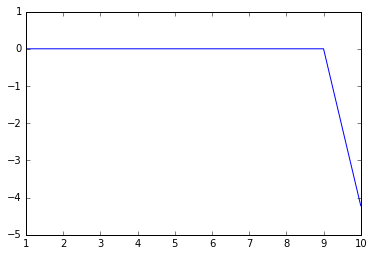

In [98]:
pl.plot(xrange(1,11), [simpleGD(o, 0.1, 100) for o in xrange(1,11)])

That's not... Visual inspection of the figure above shows that we got stuck in a local optimum.

Below we define a simple visualization function to show where the GD algorithm brings us. It can be overlooked.

In [112]:
def viz(x,a=-10,b=10, ax=None):
    xx  = np.linspace(a,b,100)
    yy  = function(xx)
    ygd = function(x)
    ax.plot(xx,yy)
    ax.plot(x,ygd,color='red')
    ax.plot(x[0],ygd[0],marker='o',color='green',markersize=10)
    ax.plot(x[len(x)-1],ygd[len(x)-1],marker='o',color='red',markersize=10)


Let's show the steps that were taken in the various cases that we considered above

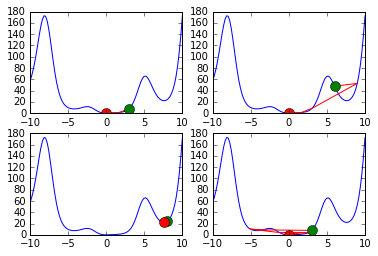

In [113]:
# Visualise the steps taken in the previous cases 
x1 = simpleGD2(3,0.1,100)
x2 = simpleGD2(6,0.1,100)
x3 = simpleGD2(8,0.01,100)
x4 = simpleGD2(3,0.5,100)
f=pl.figure()
viz(x1, ax=f.add_subplot(221))
viz(x2, ax=f.add_subplot(222))
viz(x3, ax=f.add_subplot(223))
viz(x4, ax=f.add_subplot(224))

To summarise these three cases: 
- In the first case, we start from a sensible point (not far from the optimal value $x^\star = 0$ and on a slope that leads directly to it) and we get to a very satisfactory point.
- In the second case, we start from a less sensible point (on a slope that does not lead directly to it) and yet the algorithm still gets us to a very satisfactory point.
- In the third case, we also start from a bad location but this time the algorithm gets stuck in a local minima.


# Attacking MNIST

### Learning Activity 7: Loading the Python libraries

Import statements for KERAS library

In [114]:
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils

# Some generic parameters for the learning process
batch_size = 100   # number of instances each noisy gradient will be evaluated upon
nb_classes = 10    # 10 classes 0-1-...-9
nb_epoch   = 10    # computational budget: 10 passes through the whole dataset

Using Theano backend.


### Learning Activity 8: Loading the MNIST dataset

Keras does the loading of the data itself and shuffles the data randomly. This is useful since the difficulty
of the examples in the dataset is not uniform (the last examples are harder than the first ones)

In [122]:
# Load the MNIST data using mnist.load_data, store it in (images_train,labels_train)
import cPickle
with open('/day2/datasets/mnist.pkl') as f:
    #(X_train, y_train), (X_test, y_test) = cPickle.load(f, encoding="bytes") py>3
    (images_train, labels_train), (images_test, labels_test) = cPickle.load(f)

You can also depict a sample from either the training or the test set using the `imshow()` function:

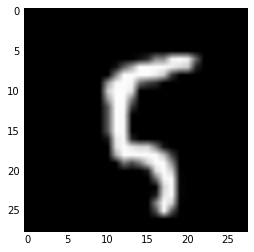

In [124]:
# Display the first image using imshow
pl.imshow(images_train[100,], cmap="gray")

Ok the label 5 does indeed seem to correspond to that number!
Let's check the dimension of the dataset

### Learning Activity 9: Reshaping the dataset


Each image in MNIST has 28 by 28 pixels, which results in a $28\times 28$ array. As a next step, and prior to feeding the data into our NN classifier, we needd to flatten each array into a $28\times 28$=784 dimensional vector. Each component of the vector holds an integer value between 0 (black) and 255 (white), which we need to normalise to the range 0 and 1.

In [129]:
# Reshaping of vectors in a format that works with the way the layers are coded.
# the aim is to reshape the training and test sets as matrices of size N*784 where N is the number of instances
# (60000 for train, 10000 for test) and 784 pixels. Use the command reshape for this. We also need to convert
# the values in 'float32' (they are stored in another format), use the command astype for this. Finally 
# we need to normalise the values to be between [0,1] (they are stored as a value between 0 and 255). 
help(np.reshape)

Help on function reshape in module numpy.core.fromnumeric:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is inferred
        from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the elements
        into the reshaped array using this index order.  'C' means to
        read / write the elements using C-like index order, with the last axis
        index changing fastest, back to the first axis index changing slowest.
        'F' means to read / write the elements using Fortran-like index order,
        with the firs

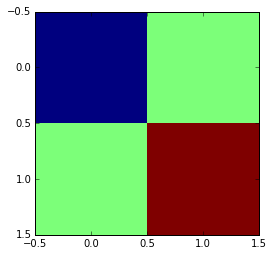

In [138]:
arr = np.array([[0,1],[1,2]], dtype=np.float64)
pl.imshow(arr, interpolation="nearest")

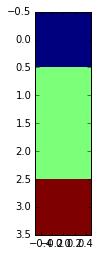

In [141]:
pl.imshow(arr.reshape(4,1), interpolation="nearest")


Remember, it is always good practice to check the dimensionality of your _train_ and _test_ data using the `shape` command prior to constructing any classification model:


In [162]:
import operator
images_train_reshaped = [img.reshape(operator.mul(*img.shape),1) for img in images_train]
images_test_reshaped = [img.reshape(operator.mul(*img.shape),1) for img in images_test]


In [165]:
# Check the dimensionality of train and test
[image.shape for image in images_train_reshaped]
[image.shape for image in images_test_reshaped]

[(784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),
 (784, 1),

So we have 60,000 training samples, 10,000 test samples and the dimension of the samples (instances) are 28x28 arrays. We need to reshape these instances as vectors (of 784=28x28 components). For storage efficiency, the values of the components are stored as Uint8, we need to cast that as float32 so that Keras can deal with them. Finally we normalize the values to the 0-1 range.


The labels are stored as integer values from 0 to 9. We need to tell Keras that these form the output categories via the function `to_categorical`.


In [171]:
# Set y categorical using np_utils.to_categorical, you need to specify the number of classes.
labels_train2 = np_utils.to_categorical(labels_train, nb_classes)
labels_test2 = np_utils.to_categorical(labels_test, nb_classes)

In [176]:
labels_train2.min()
labels_train2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

### Learning Activity 10: Building a NN classifier


A neural network model consists of artificial neurons arranged in a sequence of layers. Each layer receives a vector of inputs and converts these into some output. The interconnection pattern is "dense" meaning it is fully connected to the previous layer. Note that the first hidden layer needs to specify the size of the input which amounts to implicitly having an input layer.


In [ ]:
# First, declare a model with a sequential architecture using Sequential

# Then add using model.add a first layer with 500 nodes and 784 inputs (the pixels of the image)

# Define the activation function to use on the nodes of that first layer

# Second hidden layer with 300 nodes

# Output layer with 10 categories (+using softmax)

### Learning Activity 11: Training and testing of the model


Here we define a somewhat standard optimizer for NN. It is based on Stochastic Gradient Descent with some standard choice for the annealing.


In [ ]:
# Definition of the optimizer using the command SGD of Keras, you then need to "compile" the model with this optimizer

Finding the right arguments here is non trivial  but the choice suggested here will work well. The only parameter we can explain here is the first one which can be understood as an initial scaling of the gradients. 


At this stage, launch the learning (fit the model). The `model.fit` function takes all the necessary arguments and trains the model. We describe below what these arguments are:

- the training set (points and labels)
- global parameters for the learning (batch size and number of epochs)
- whether or not we want to show output during the learning
- the test set (points and labels)

In [ ]:
# Fit the model


Obviously we care far more about the results on the validation set since it is the data that the NN has not used for its training. Good results on the test set means the model is robust.



In [ ]:
# Display the results, the accuracy (over the test set) should be in the 98%

### Bonus: Does it work?

In [ ]:
def whatAmI(img):
    score = model.predict(img,batch_size=1,verbose=0)
    for s in range(0,10):
        print ('Am I a ', s, '? -- score: ', np.around(score[0][s]*100,3))

In [ ]:
index = 1004 # here use anything between 0 and 9999
test  = np.reshape(images_train[index,],(1,784))
plt.imshow(np.reshape(test,(28,28)), cmap="gray")
whatAmI(test)


### Does it work? (experimental Pt2)

In [ ]:
from scipy import misc

In [ ]:
test  = misc.imread('data/ex7.jpg')
test  = np.reshape(test,(1,784))
test  = test.astype('float32')
test /= 255.
plt.imshow(np.reshape(test,(28,28)), cmap="gray")
whatAmI(test)

In [75]:
import cProfile